# Applied Linear Algebra - Lab 3
Ferdowsi University of Mashhad - Computer Engineering Department

Spring 2023

### Table of Contents

* [Adaline](#sec1)
* [Calculating the Inverse](#sec2)
* [Determinant](#sec3)

* [Exercises]()
    * [Implement Determinant](#sec5)
    * [Implement Inverse](#sec6)
    * [Adaline for Regression](#sec9)
    * [Adaline for classification](#sec10)


* [Questions]()
    * [Question1](#sec4)
    * [Question2](#sec7)
    * [Question3](#sec8)



# Adaline <a class="anchor" id="sec1"></a>

Adaline (Adaptive Linear Neuron) is a type of artificial neural network that was introduced in the late 1950s. It is a single-layer neural network that uses the linear activation function and the least-mean-squares (LMS) algorithm to learn the weights of the network.

The Adaline network consists of an input layer, a single neuron, and an output layer. The input layer consists of the input values, which are multiplied by the weights of the network and summed up. The sum is then passed through the activation function to produce the output of the network.

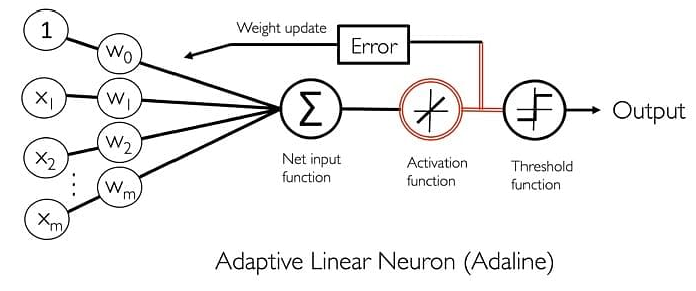

The activation function used in Adaline is a linear function of the input values, which means that the output of the network is a linear combination of the input values and the weights of the network. The LMS algorithm is used to adjust the weights of the network so that the output of the network matches the desired output.

$$
\begin{gather*}
\hat{y} = X^T \cdot W \\
e = y - \hat{y} = y - X^T \cdot W
\end{gather*}
$$

Where $X$ is the input of the network, $W$ is the weight matrix, and $y$ is the true labels of the inputs. The objective is to find $W$ such that it minimizes the LMS error. 

$$
\begin{gather*}
E = \cfrac{1}{N} \sum_{i=1}^{N} e_{x_i} ^ 2 = \cfrac{1}{N} \sum_{i=1}^{N}(y_i - X_i^T \cdot W)^2
\end{gather*}
$$

This iterative process can be converted to a vectorized process as follows:

$$
\begin{gather*}
E_1 = \begin{bmatrix} e_1\\...\\e_n \end{bmatrix}_{n \times 1}, \quad y = \begin{bmatrix} y_1\\...\\y_n \end{bmatrix}_{n \times 1}, \quad X = \begin{bmatrix} X_1 & ... & X_n \end{bmatrix}_{m \times n} \\\\\\
E = \cfrac{1}{N} E_1^T E_1 = \cfrac{1}{N} (y - X^T \cdot W)^T (y - X^T \cdot W)
\\
\Rightarrow E = \cfrac{1}{N} (y^T y - y^T X^T W - W^TXy + W^T XX^T W)
\end{gather*} 
$$

Then we calculate $\cfrac{\partial E}{\partial W} = 0$ to find optimal weight values or $W^*$.

$$
\begin{gather*}
\cfrac{\partial E}{\partial W} = 0 \quad \Rightarrow \quad -Xy - Xy + XX^TW + XX^TW = 0\\
\Rightarrow (XX^T)W^* = Xy \quad \Rightarrow \quad W^* = (XX^T)^{-1}Xy
\end{gather*}
$$

<a class="anchor" id="sec4"></a>
This equation requires $XX^T$ to be invertible, and since $rank(XX^T) = rank(X)$, a necessary condition for $XX^T$ to be invertible is $m \le n$ where $n$ is the number of samples in the dataset and $m$ is the length of the feature space.
Why is this the case, and what happens if this condition doesn't get satisfied?

# Calculating the Inverse <a class="anchor" id="sec2"></a>

We understood how to calculate $W^*$. In this section, First we calculate the inverse of a matrix using the cofactor matrix. For that, we need to follow these steps:


1.   Calculate the determinant of the matrix.
2.   Calculate the cofactor matrix of the matrix.
3.   Take the transpose of the cofactor matrix to obtain the adjugate matrix.
4.   Divide the adjugate matrix by the determinant to obtain the inverse matrix.


Let's say we have a square matrix $A$ and we want to find its inverse using the cofactor matrix method. The first step is to calculate the determinant of the matrix, which we'll call $det(A)$. If $det(A) = 0$, then the matrix is not invertible and we cannot use the cofactor matrix method.

Assuming that $det(A) ≠ 0$, we can proceed to step 2. The cofactor matrix of $A$ is a matrix $C$ where each element $c_{ij}$ is given by:

$$
c_{ij} = (-1)^{i+j} \cdot M_{ij}
$$

where $M_{ij}$ is the determinant of the matrix obtained by deleting the $i_{th}$ row and $j_{th}$ column of $A$. That is, $M_{ij}$ is the minor of $A$ corresponding to the element $a_{ij}$.

Once we have the cofactor matrix $C$, we can take its transpose to obtain the adjugate matrix $adj(A)$.
Finally, we divide the adjugate matrix by the determinant of $A$ to obtain the inverse matrix $A^{-1}$. That is,
$$
A^{-1} = \cfrac{1}{det(A)} \cdot adj(A)
$$



# Determinant <a class="anchor" id="sec3"></a>

Let us begin with the determinant function. We will use the cofactor method to calculate the determinant. Let's say we have a square matrix $A$ and we want to find its determinant using the cofactor method. We can choose any row or column of the matrix to use in step 2. For simplicity, let's assume we choose the first row.

We start by calculating the cofactor of the element in the first row and first column, which is given by $(-1)^{1+1}$ times the determinant of the matrix obtained by deleting the first row and first column of A. That is, the cofactor of a11 is given by:

$$
C_{11} = (-1)^{1+1} \cdot det(A_{11})
$$

where $A_{11}$ is the matrix obtained by deleting the first row and first column of $A$.

We then move on to the second element in the first row, $a_{12}$. Its cofactor is given by $(-1)^{1+2}$ times the determinant of the matrix obtained by deleting the first row and second column of $A$. That is,

$$
C_{12} = (-1)^{1+2} \cdot det(A_{12})
$$

where $A_{12}$ is the matrix obtained by deleting the first row and second column of $A$.

We continue in this way, calculating the cofactor for each element in the first row. Once we have all the cofactors, we multiply each element in the first row by its corresponding cofactor, and then sum up the products to obtain the determinant of $A$. That is,

$$
det(A) = a_{11}C_{11} + a_{12}C_{12} + ... + a_{1n}*C_{1n}
$$

where $C_{ij}$ is the cofactor of the element in the $i_{th}$ row and $j_{th}$ column of $A$.

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Exercise 1 <a class="anchor" id="sec5"></a>

In [32]:
def determinant(m, mul=1.0):
    
    if m.shape[0] == 1:
        return mul * m[0][0]
    else:
        sign = 1.0
        sum = 0.0
        for i in range(m.shape[0]):
            # remove the corresponding column
            mat = np.delete(m, (i), axis=1)
            
            # call determinant recursively 
            sum += mul * determinant(mat[1:], sign*m[0, i])
            sign *= -1

        return sum

In [33]:
a = np.random.randint(-2, 3, (3, 3))
print('Our determinant: ')
print(determinant(a))

print('Numpy determinant: ')
print(np.linalg.det(a))

# our result and numpy should be the same


Our determinant: 
18.0
Numpy determinant: 
17.999999999999996


### Exercise 2 <a class="anchor" id="sec6"></a>
Now, we can proceed to implement the inverse function.

In [34]:
def inverse(m):
    d = determinant(m)

    if m.shape[0]==1:
        inv = np.array([[1/d]])
    else:
        cf_mat = np.zeros(m.shape)
        for i in range(m.shape[0]):
            for j in range(m.shape[1]):

                coef = (-1) ** (i + j)

                # remove the corresponding row and column
                m_hat = np.delete(m, (i), axis=0)
                m_hat = np.delete(m_hat, (j), axis=1)

                # calculate the determinant of the remaining matrix
                m_hat_det = determinant(m_hat)
                cf_mat[i, j] = m_hat_det * coef

        adj = np.matrix.transpose(cf_mat)
        inv = (1 / d) * adj
    return inv

## Instability of our proposed inverse <a class="anchor" id="sec7"></a>

The inverse function that we have implemented is unstable and works fine only for small matrices. Besides that, this method is recursive and slow. Thus, for data with more features, we have complexity. Why is this the case, and discuss the ways to improve.

In [35]:
def hilbert(n=10):
    a = np.ones((n, n))

    for i in range(n):
        for j in  range(n):
            a[i, j] = a[i, j] / (i+j+1)

    return a

In [36]:
a = np.random.randint(-2, 3, (3, 3))
print('Our inverse: ')
print(inverse(a))

print('Numpy inverse: ')
print(np.linalg.inv(a))

# our result and numpy should be the same


Our inverse: 
[[ 0.25  0.5   1.  ]
 [-0.5  -1.   -1.  ]
 [ 0.   -1.   -1.  ]]
Numpy inverse: 
[[ 0.25  0.5   1.  ]
 [-0.5  -1.   -1.  ]
 [-0.   -1.   -1.  ]]


In [105]:
diff=[]

for i in range(2, 9):
    a = hilbert(i)
    i1 = inverse(a)
    i2 = np.linalg.inv(a)

    diff.append(np.sum(abs(i2-i1)))

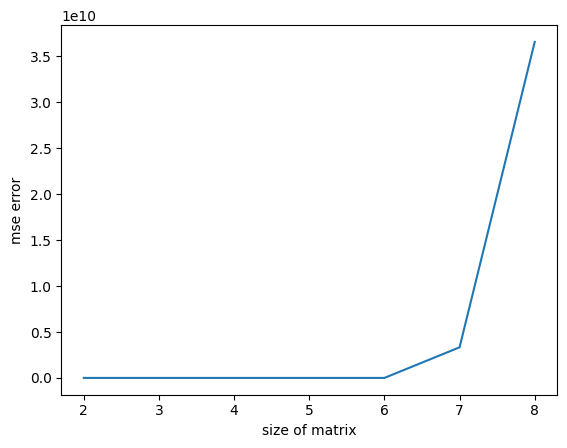

In [107]:
plt.plot(np.arange(2, 9, 1), diff)
plt.xlabel('size of matrix')
plt.ylabel('mse error')
plt.show()

Finally, we can implement Adaline using our inverse function. We explore adaline properties both for regression and classification problems. 

# Adaline for Regression <a class="anchor" id="sec9"></a>

`generate_regression_data` function will create an artificial dataset for our regression problem. This function will receive $n$ as an input which is the number of samples in the dataset.

In [65]:
def generate_regression_data(n=200):
    x = np.random.uniform(0, 20, n)
    a = np.random.uniform(0.3, 0.5, n)
    b = np.random.uniform(-1.5, 1.5, n)
    y = a * x + b 
    return x.reshape(-1, 1), y.reshape(-1, 1)

In [66]:
X, y = generate_regression_data(n=100)
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


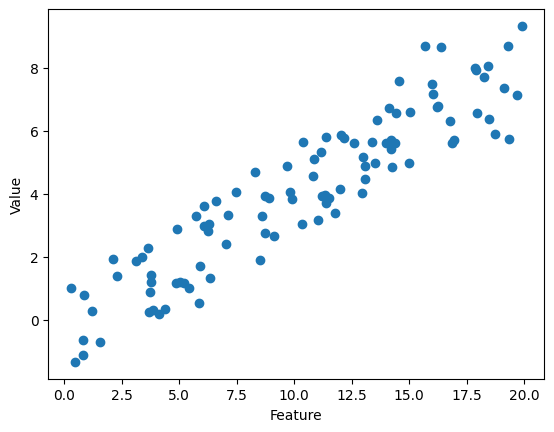

In [67]:
plt.scatter(X, y)
plt.xlabel('Feature')
plt.ylabel('Value')

plt.show()

In [72]:
# implement the adaline function using the proposed formula

def adaline(X, y):
    w_star = np.matmul(inverse(np.matmul(X.T, X)),  np.matmul(X.T, y))
    return w_star

In [69]:
# calculate the W* and transform the X.

w = adaline(X, y)
y_pred = X @ w

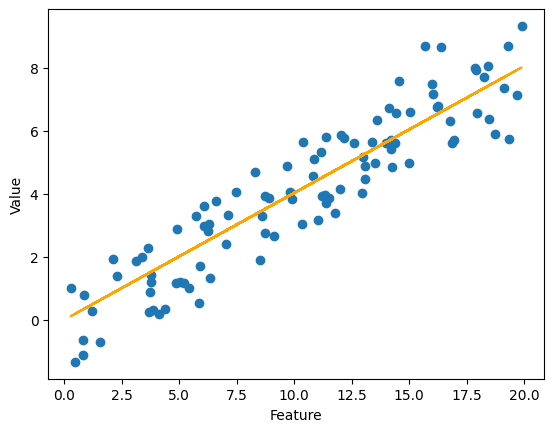

In [71]:
plt.scatter(X, y)
plt.plot(X, y_pred, c='orange')
plt.xlabel('Feature')
plt.ylabel('Value')

plt.show()

# Adaline for Binary Classification <a class="anchor" id="sec10"></a>

`generate_binary_classification_data` function will create an artificial dataset for our binary classification problem. This function will receive $n$ as an input which is the number of samples in the dataset.

In [57]:
def generate_binary_classification_data(mu_vec1, mu_vec2, cov_mat1, cov_mat2, n=100):
    
    x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, int(n/2))
    x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, int(n/2))

    class1_label = np.ones(int(n/2), dtype='int')
    class2_label = np.zeros(int(n/2), dtype='int')

    x = np.concatenate((x1_samples, x2_samples))

    y = np.concatenate((class1_label, class2_label))

    return x, y.reshape(-1, 1)

In [75]:
m1 = np.array([2, 7])
m2 = np.array([1, 1])
c1 = np.array([[1.5, 0], [0, 1.5]])
c2 = np.array([[1, 0], [0, 1]])

X, y = generate_binary_classification_data(m1, m2, c1, c2, n=100)

print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


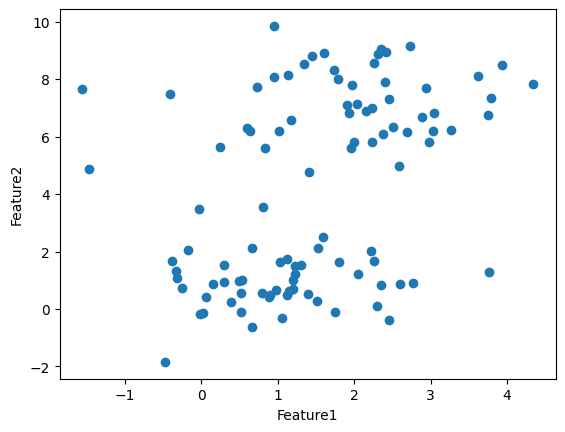

In [76]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

In [77]:
def plot_decision_boundary(X, y):
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)

    xx, yy = np.meshgrid(x1grid, x2grid)

    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    grid = np.hstack((r1,r2))

    # start 

    w = adaline(X, y)
    # use 'grid' instead of 'X' here
    y_pred = grid @ w
    y_pred[y_pred>0.5]=1
    y_pred[y_pred<=0.5]=0

    # end

    zz = y_pred.reshape(xx.shape)


    plt.contourf(xx, yy, zz, cmap='Paired')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')


    for class_value in range(2):
        row_ix = np.where(y == class_value)
        plt.scatter(X[row_ix, 0], X[row_ix, 1])

    plt.show()

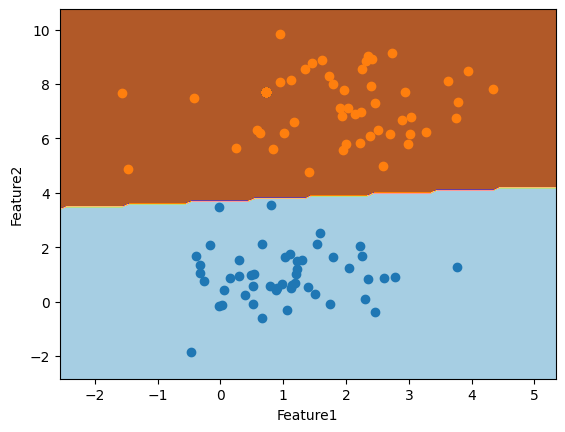

In [78]:
plot_decision_boundary(X, y)

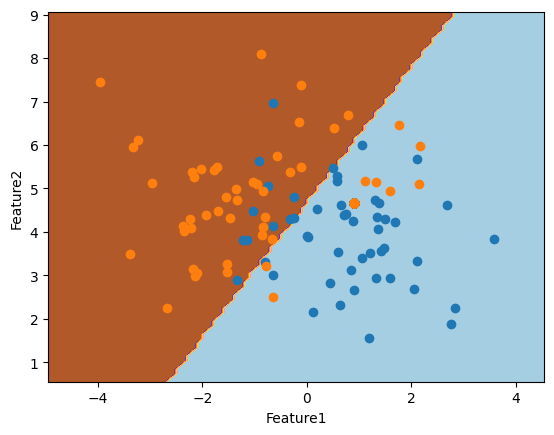

In [80]:
m1 = np.array([-1, 5])
m2 = np.array([1, 4])
c1 = np.array([[1.5, 0], [0, 1.5]])
c2 = np.array([[1, 0], [0, 1]])

X, y = generate_binary_classification_data(m1, m2, c1, c2, n=100)
plot_decision_boundary(X, y)

# Classification on the breast cancer dataset

In [81]:
data = load_breast_cancer()
X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [82]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 30)
(426,)
(143, 30)
(143,)


<a class="anchor" id="sec8"></a>
As can be seen, the breast cancer dataset has 30 features, so we cannot use our proposed inverse method because of the instability and speed problem that we have discussed. In this section, you have to implement the adaline using numpy inverse and test it on the breast cancer dataset and check the accuracy for the train and test dataset. discuss the ways to improve the results.

In [83]:
# implement the adaline function using the numpy inverse

def adaline_numpy(X, y):
    w_star = np.matmul(np.linalg.inv(np.matmul(X.T, X)),  np.matmul(X.T, y))
    return w_star

In [84]:
w = adaline_numpy(X_train, y_train)
y_pred_test = X_test @ w
y_pred_train = X_train @ w

In [85]:
print(accuracy_score(y_test, y_pred_test.round().astype('uint8')))
print(accuracy_score(y_train, y_pred_train.round().astype('uint8')))

0.9300699300699301
0.9507042253521126
